# Maximum Independent Set

or _Let's use Quantum computers to solve optimization problems!_

## Before we start

Don't hesitate to ask me to go faster or slower!

Any question, now or later? We have a Slack: https://join.slack.com/t/pasqal-community/shared_invite/zt-3c7awg903-F7RYBucMMj~bZkUkoXeklQ .

## Today's menu

1. From research to industry.
2. Introduction to Maximum Independent Set.
3. Using Maximum Independent Set to solve real-world problems.
4. A quick glimpse behind the Quantum curtain.

---

## From research to industry

### About Pasqal

FIXME

### About the Pasqal Open-Source Community

FIXME

---

## It starts with graphs

Graphs are all the rage!

FIXME: Image of a graph.

A few applications of graphs:

- represent molecules;
- represent roads;
- represent dependencies;
- represent _conflicts_.

### Maximum Independent Set (MIS)

It starts with a graph $G=(V, E)$. Each node is a possible action to take. Two nodes are connected if they are in _conflict_.

FIXME: Image of a graph.

**Independent Set** Given an undirected graph $G=(V, E)$, a set of nodes $V' \subseteq V$ is _independent_ in $G$ if $V'^2 \cap E = \empty$.

Or: an **Independent Set** is a set of non-conflicting actions.

FIXME: Image of an independent set.

**MaximAL Independent Set** Given a graph $G=(V, E)$, a set of nodes $V'$ is a MaximAL Independent Set if there is no $V''$ such that satisfies all of:
- $V' \subsetneq V''$
- $V'' \subseteq V$
- $V''$ is independent in $G$.

Or: a **MaximAL Independent Set** is a set of non-conflicting actions that you can't grow without triggering a conflict.

FIXME: Image of a maximal independent set.

**MaximUM Independent Set** (MIS) Given a graph $G=(V, E)$, a set of nodes $V'$ is a MaximUM Independent Set if there is no $V''$ such that satisfies all of:
- $|V''| > |V'|$
- $V''$ is independent in $G$.

Or: a **Maximum Independent Set** is a largest set of non-conflicting actions, i.e. a "best solution".

FIXME: Image of a maximum independent set.

Variants: Weighted Maximal Independent Set, Weighted Maximum Independent Set.


### Applications

- Scheduling industrial processes (factory workflows, satellite launches, taxis, exams...)
- Symbolic Artificial Intelligence
- Circuit Design
- Theorem Proving
- Static Application Security Testing
- Compiler Optimizations (register allocation)
- Graph coloring
- Solving puzzles (logical puzzles, sudoku, ...)
- ...

### What about Quantum?

Solving MIS is $O(3^{\frac{n}{3}})$, i.e. it quickly grows untractable.

Quantum can run many instances (not all) in _polynomial time_, i.e. exponentially faster.

Part of the work is experimenting to determine whether we're in a good instance or how to pre-/post-process the graph to make it happen.

---

## Tech setup

You will need:

1. Python 3.10+
2. Either Visual Studio Code or some other mean to open a Jupyter Notebook
3. This notebook FIXME

### Download the notebook

#### If you have git

```sh
$ cd YOUR_FAVORITE_DIRECTORY
$ git clone FIXME
```

#### If you don't

1. Open your browser at FIXME
2. Save the file.


### Starting

1. Open Visual Studio Code.
2. Install extension [Jupyter](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.jupyter).
3. Open `maximum-independent-set.ipynb` (this file).

In [1]:
%pip install maximum-independent-set

Note: you may need to restart the kernel to use updated packages.


---

## Graphs as conflicts

1. I have access to Python 3.9, 3.10, 3.11, 3.12.
2. I need package `mygreatlib` and package `anotherlib`.
3. Package `mygreatlib` conflicts with Python 3.11 or Python 3.12.
4. Package `anotherlib` conflicts with Python 3.9 and Python 3.12.

Can I find a solution?

Spoiler: yes.

> **Hands-on**
>
> 1. Draw this list of constraints into a graph of conflicts.
> 2. Create a `networkx` graph to represent it.
> 3. Draw it.

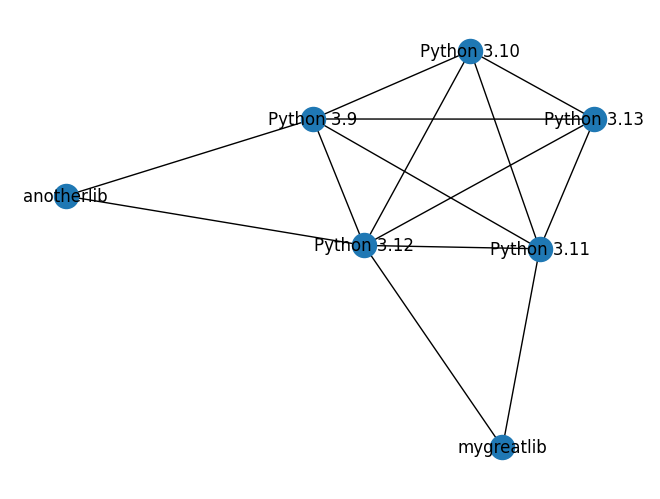

In [2]:
import networkx as nx

graph = nx.Graph()
PYTHON_VERSIONS = ["Python 3.9", "Python 3.10", "Python 3.11", "Python 3.12", "Python 3.13"]
graph.add_nodes_from(PYTHON_VERSIONS)
graph.add_nodes_from(["mygreatlib", "anotherlib"])

for i, v in enumerate(PYTHON_VERSIONS):
    for w in PYTHON_VERSIONS[i+1:]:
        graph.add_edge(v, w)

# YOUR TURN: Add the missing edges of the graph using `graph.add_edge`.

# FIXME: Remove this (start)

graph.add_edge("mygreatlib", "Python 3.11")
graph.add_edge("mygreatlib", "Python 3.12")
graph.add_edge("anotherlib", "Python 3.9")
graph.add_edge("anotherlib", "Python 3.12")

# FIXME: Remove this (end)

nx.draw(graph, with_labels=True)

> **Hands-on**
>
> 1. Can you find a Maximum Independent Set?
> 2. Find one Independent Set that is not a subset of a Maximum Independent Set.

### Solving this without Quantum

In [3]:
# Maximal independent set?
nx.maximal_independent_set(graph)

['Python 3.12']

In [4]:
# Maximum independent set?
nx.approximation.maximum_independent_set(graph)

{'Python 3.10', 'anotherlib'}

> **Question**
>
> Are these answers correct?
>
> What happened?

**Note** Not just a demo effect: historically, package managers (in particular Python's package managers) have had difficulties with such constraint resolutions.

## Introducing Pasqal's `maximum-independent-set`

A Python library that solves maximum independent sets using quantum.

- On a physical QPU.
- On HPC quantum emulators.
- Or on a local quantum emulator.

Documentation at: https://pasqal-io.github.io/maximum-independent-set/latest .

### Hello, world


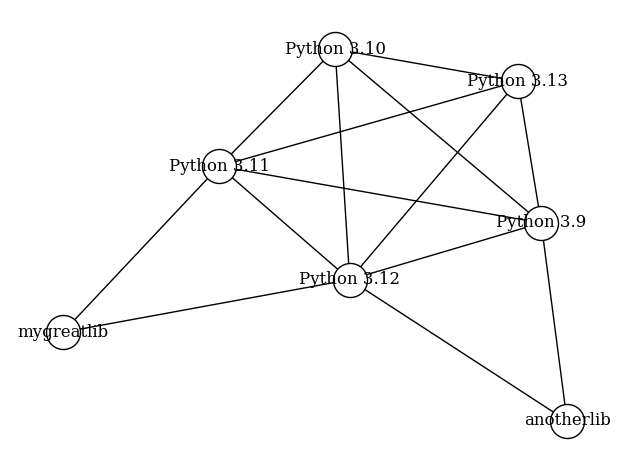

In [5]:
from mis import MISInstance

# YOUR TURN: Wrap graph into a MISInstance

# FIXME: Remove this (start)

instance = MISInstance(graph)

# FIXME: Remove this (end)

instance.draw()

## Solving

`mis` provides a _quantum solver_ ­-- and many ways to use it.

YORIC: preprocessing loop starting with 7 nodes
YORIC: ...removing isolated node 1
YORIC: ...removing isolated node 5
YORIC: ...removing isolated node 6
YORIC: ...after isolated node removal 0 nodes
YORIC: ...after twin reduction 0 nodes
YORIC: ...after node folding 0 nodes
YORIC: ...after unconfined/diamond 0 nodes
YORIC: preprocessing loop out of nodes
YORIC: Preprocessor reduced the data to nothing
YORIC: Found 1 solutions


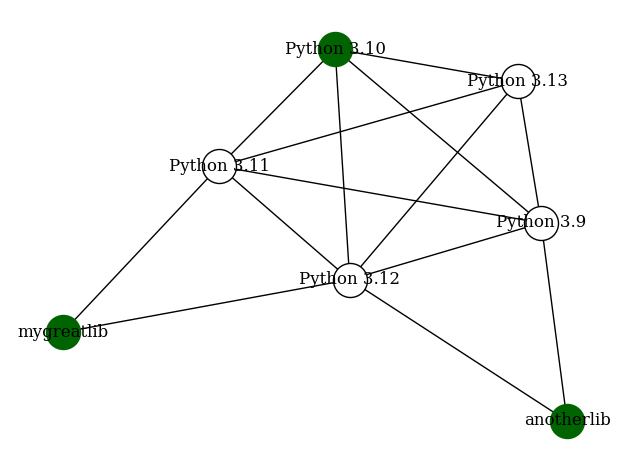

In [ ]:
from mis import MISSolver, SolverConfig, BackendConfig

config = SolverConfig(
    # Pick a reasonable quantum emulator.
    backend=BackendConfig(),
    max_number_of_solutions=10,
    preprocessor=None,
)

# Note: If you don't pick a config, it will use non-quantum solving.
solver = MISSolver(instance, config)
solutions = solver.solve()

# Then draw!
for s in solutions:
    s.draw()

...and that's it.

In many cases, that's all you need to use this library.

Now let's see if we can break it.

> **Your turn**
>
> How many nodes / constraints before it's too slow to use?
>
> Why?

---

## Limitations

- We embed/compile the graph as (physical) atoms.
- One node => one atom.
- One edge => atoms must be close enough.
- Energy states ensure that each atom behaves as one qubit.
- A quantum emulator simulates the quantum mechanics of these atoms.
- Quantum mechanics are (very) non-deterministic.

**Corollary** Not all graphs can be embedded/compiled to a QPU/emulator.

> **Your turn**
>
> What are the limitations you may encounter running `mis` on an emulator?
>
> What are the limitations you may encounter running `mis` on a QPU?

### Limiting qubit usage (built-in)

FIXME

To experiment, try deactivating the preprocessor in `SolverConfig`.

### Using more qubits

1. use a physical QPU;
2. use an optimized emulator;
3. use a HPC cluster emulator.

If you have a GPU, you can use `BackendConfig(backend=BackendType.EMUMPS)` to considerably improve performance.

### Limiting sensitivity to positions

`SolverConfig(method=MethodType.GREEDY)`

FIXME

---

## Going further

1. Source, documentation, tutorials: https://github.com/pasqal-io/maximum-independent-set/ .
2. The Pasqal community: https://join.slack.com/t/pasqal-community/shared_invite/zt-3c7awg903-F7RYBucMMj~bZkUkoXeklQ .
3. More Pasqal software, access to QPUs, etc : https://community.pasqal.com/ .